In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from ase.io import read
from matplotlib.ticker import AutoMinorLocator

In [ ]:
## Set up the plotting environment
# # matplotlib.rcParams.update(matplotlib.rcParamsDefault)
plt.rc('text', usetex=True)
plt.rc('font', family='cmr10', size=12)
plt.rcParams["axes.formatter.use_mathtext"] = True

In [ ]:
## Set the plotting parameters
method = "RSS"
identifier = ""
bin_width = 0.1
rlxd_string = "rlxd"
seed = 0

In [ ]:
## Load the data
energies = []
if method == "RAFFLE":
    filename = "D"+method+"/DTMP"+identifier+"/energies_"+rlxd_string+"_seed"+str(seed)+".txt"
    with open(filename) as f:
        for line in f:
            index, energy = line.split()
            index = int(index)
            energy = float(energy)
            energies.append(energy)
else:
    filename = "D"+method+"/DTMP"+identifier+"/"+rlxd_string+"_structures_seed"+str(seed)+".traj"
    traj = read(filename, ":")
    for atoms in traj:
        energies.append(atoms.get_potential_energy() / len(atoms))

In [ ]:
## Get the delta energies and bin them
en_per_atom = np.array(energies)
delta_en_per_atom = en_per_atom - np.min(en_per_atom)

# further reduce the delta_en_per_atom and count by the bin width
delta_en_per_atom_rounded = np.round(delta_en_per_atom / bin_width) * bin_width
delta_en_per_atom_binned = np.unique(delta_en_per_atom_rounded)

counts = np.zeros(len(delta_en_per_atom_binned))
for i, en in enumerate(delta_en_per_atom_rounded):
    counts[np.where(delta_en_per_atom_binned == en)] += 1

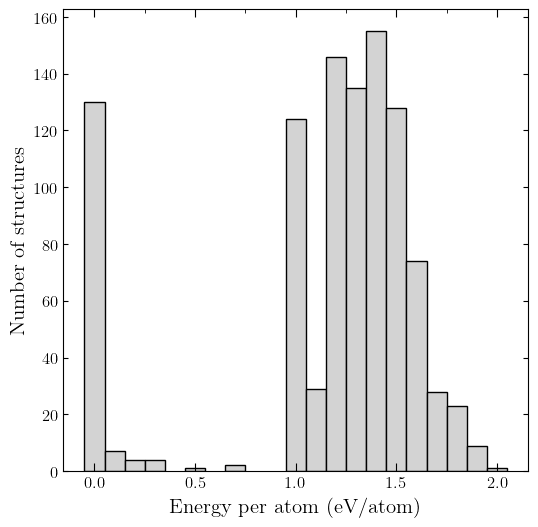

In [ ]:
## Plot the number structures vs the energies per atom
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
plt.bar(delta_en_per_atom_binned, counts, width=0.1)
plt.xlabel('Energy per atom (eV/atom)', fontsize=15)
plt.ylabel('Number of structures', fontsize=15)
ax.tick_params(axis='x', which='minor', length=3)
ax.tick_params(axis='x', which='major', length=6)
ax.tick_params(axis='x', which='both', labelbottom=True, top=True, direction='in')
ax.tick_params(axis='y', which='both', labelbottom=True, right=True, direction='in')
plt.bar(delta_en_per_atom_binned, counts, width=0.1, color='lightgrey', edgecolor='black')

ax.set_xticks(np.arange(0, max(2.0,max(delta_en_per_atom_binned)) + 0.5, 0.5))
ax.xaxis.set_minor_locator(AutoMinorLocator(2))

## Save the plot
plt.savefig("C_"+method+identifier+"_structures_vs_deltaE_"+rlxd_string+"_seed"+str(seed)+".pdf", bbox_inches='tight', pad_inches=0, facecolor=fig.get_facecolor(), edgecolor='none')
